In [15]:
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np
sns.set_style("dark")

# Number of Records 

In [ ]:
train = pd.read_csv('train.csv').fillna('')
test = pd.read_csv('test.csv').fillna('')

submission = pd.read_csv('sample_submission.csv')
print("Records in training set:",len(train))
print("Records in test set:",len(test))
print(train.head())
print(test.head())

# Check Missing Values 

In [6]:
print("Missing values in Train dataset")
null_check_train=train.isnull().sum()
print(null_check_train)
print("Missing values in Test dataset")
null_check_test=test.isnull().sum()
print(null_check_test)

Missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Missing values in Test dataset
id              0
comment_text    0
dtype: int64


# Category Distribution 

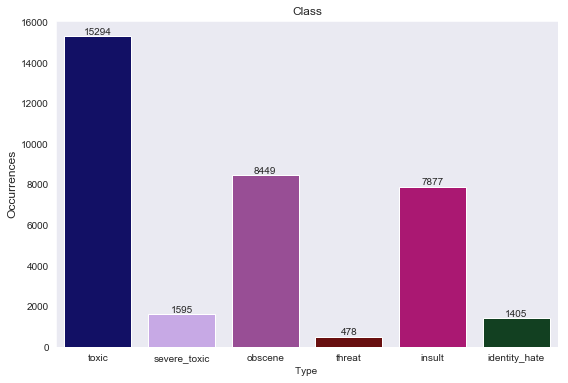

In [7]:

colors_list = ["deep blue", "lavender", "ugly purple",
               "blood", "magenta", "pine green", "brownish green"]

palette= sns.xkcd_palette(colors_list)

x=train.iloc[:,2:].sum()

plt.figure(figsize=(9,6))
ax= sns.barplot(x.index, x.values,palette=palette)
plt.title("Class")
plt.ylabel('Occurrences', fontsize=12)
plt.xlabel('Type ')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 10, label, 
            ha='center', va='bottom')

plt.show()

# Count of each Category

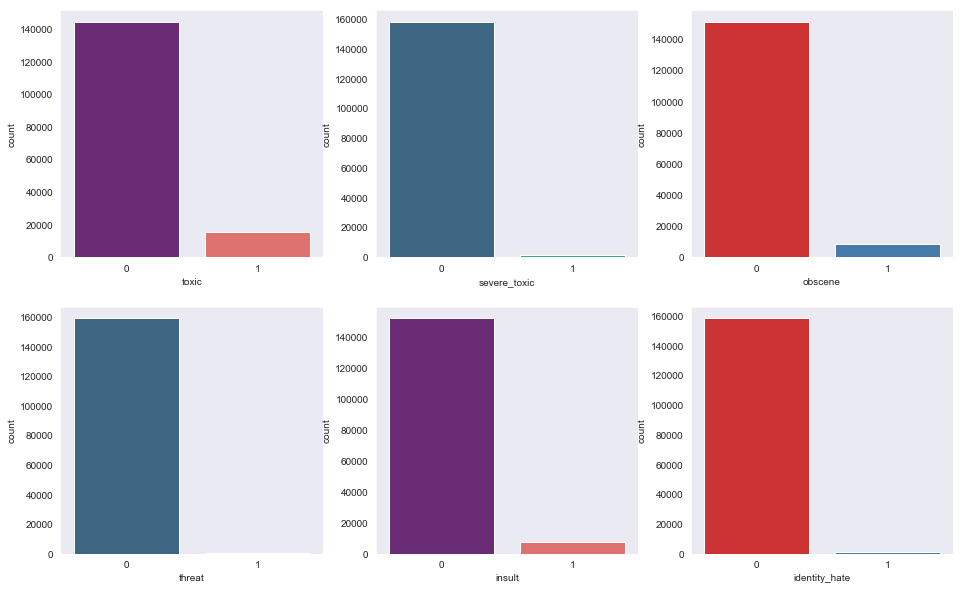

In [8]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(train['toxic'],palette= 'magma',ax=ax1)
sns.countplot(train['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(train['obscene'], palette= 'Set1',ax=ax3)
sns.countplot(train['threat'], palette= 'viridis',ax = ax4)
sns.countplot(train['insult'], palette = 'magma',ax=ax5)
sns.countplot(train['identity_hate'], palette = 'Set1', ax = ax6)

# Word Cloud

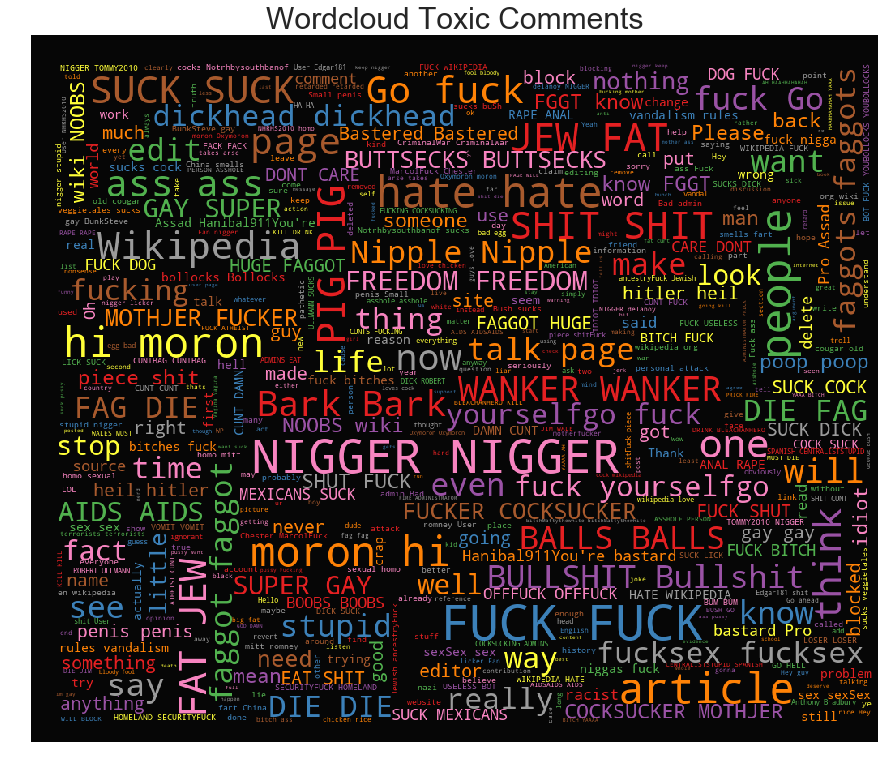

In [16]:

toxic=train[train.toxic==1]['comment_text'].values
mask=np.array(Image.open('word_cloud_image.png'))
mask=mask[:,:,1]

from wordcloud import WordCloud, STOPWORDS
# The wordcloud of Toxic Comments
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=500,mask=mask 
             , stopwords=STOPWORDS, max_font_size= 60)
wc.generate(" ".join(toxic))
plt.title("Wordcloud Toxic Comments", fontsize=30)

plt.imshow(wc.recolor( colormap= 'Set1' , random_state=1), alpha=0.98)
plt.axis('off')
plt.savefig('wordcloud_toxic_comments.png')
plt.show()